In [8]:
import tensorflow as tf
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from skimage import transform, io
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid': False})

In [15]:
data_info = pd.read_csv('drivedata/driving_log.csv',
                        names=['img_center', 'img_left', 'img_right',
                               'steer_angle', 'throttle', 'brake', 'speed'],
                        sep=', ')

/home/naotoyoshida/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [16]:
data_info[:3]

,img_center,img_left,img_right,steer_angle,throttle,brake,speed
0,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,0.0,0.0,0,0.000053
1,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,0.0,0.0,0,0.000053
2,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,/home/naotoyoshida/udacity/Self-Driving-Car-Be...,0.0,0.0,0,0.000052


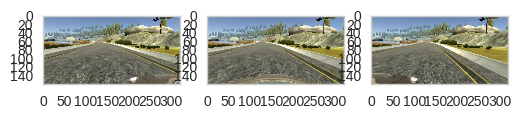

In [17]:
img = io.imread(data_info['img_left'][0])
plt.subplot(1,3,1)
plt.imshow(img)

img = io.imread(data_info['img_center'][0])
plt.subplot(1,3,2)
plt.imshow(img)

img = io.imread(data_info['img_right'][0])
plt.subplot(1,3,3)
plt.imshow(img)

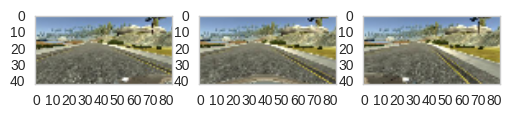

In [18]:
img = io.imread(data_info['img_left'][0])
plt.subplot(1,3,1)
img = transform.resize(img, output_shape=[42, 84])
plt.imshow(img)

img = io.imread(data_info['img_center'][0])
plt.subplot(1,3,2)
img = transform.resize(img, output_shape=[42, 84])
plt.imshow(img)

img = io.imread(data_info['img_right'][0])
plt.subplot(1,3,3)
img = transform.resize(img, output_shape=[42, 84])
plt.imshow(img)

In [19]:
data_info.shape

(5795, 7)

In [20]:
# Parameters

IMG_SIZE = 64
CHANNEL_SIZE = 3

(3, 42, 84, 3)
(3,)
index : 5795
[ 0.1545396  0.         0.       ]


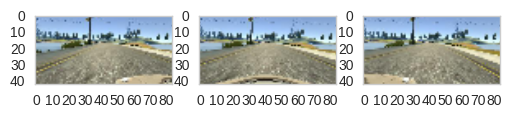

In [38]:
# Utility Functions

def get_image_and_target(index, data_info):
    X_img = []
    X_img.append(transform.resize(io.imread(data_info['img_left'][index]), output_shape=[42, 84]))
    X_img.append(transform.resize(io.imread(data_info['img_center'][index]), output_shape=[42, 84]))
    X_img.append(transform.resize(io.imread(data_info['img_right'][index]), output_shape=[42, 84]))
    
    y_target = [data_info['steer_angle'][index], data_info['throttle'][index], data_info['brake'][index]]
    return np.array(X_img, dtype=np.float32), np.array(y_target, dtype=np.float32)

index = len(data_info)
X, y = get_image_and_target(np.random.choice(range(index)), data_info)
print(X.shape)
print(y.shape)

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X[i])

print("index : {}".format(index))
print(y)

In [ ]:
# Train by keras anyway